# Estadístico de orden k

## Introducción

El estadístico de orden k de un conjunto de n elementos es el el k-ésimo elemento más pequeño. Son casos particulares de estos el máximo (k = n-1), el mínimo (k = 0) y la mediana de un conjunto (k = n/2). Se propone analizar varios algoritmos que computan este valor.

## Análisis de los algoritmos

In [5]:
%matplotlib inline
import timeit
import random
import matplotlib.pyplot as plt
from math import floor

from functools import partial
import brute_force, order_and_select, k_selections, k_heapsort, heap_select, quick_select

In [6]:
def get_random_items(n_iteration):
    elems = list(range(2**n_iteration))
    random.shuffle(elems)
    return elems
    #return [random.randint(0, 2**n_iteration) for _ in range(2**n_iteration)]

_random_cache = {}
def random_items_with_memoization(n_iteration):
    # Cada vez que se llama con el mismo n_iteration, devuelve el mismo valor
    # mucho más rapido que el full random
    if n_iteration in _random_cache:
        return _random_cache[n_iteration]
    items = get_random_items(n_iteration)
    _random_cache[n_iteration] = items
    return items

def get_same_elements(n_iteration, el=1):
    return [el for _ in range(2**n_iteration)]

In [7]:
def min_k(num):
    return 0

def max_k(num):
    # 0-based
    return num - 1

def median_k(num):
    return floor(num/2)

def plot_algorithms(modules, k_func=min_k, number=3, maxiter=10, items_getter=None):
    for module in modules:
        x, y = [], []
        for exp in range(2, maxiter):
            items = items_getter(exp) if items_getter else random_items_with_memoization(exp)
            algorithm = module.__dict__['k_min']
            timer = timeit.Timer(partial(algorithm, items, k_func(2**exp)))
            t = min(timer.repeat(number, 1))
            y.append(t)
            x.append(2**exp)
        plt.plot(x, y, label=module.__name__)

    plt.ylabel('Tiempo de ejecución')
    plt.xlabel('Cantidad de elementos en el conjunto')
    plt.legend(loc='upper left', prop={'size': 10})
    plt.show()

### Comparación de la ejecución de los algoritmos

#### Tiempo de ejecución con (listas completamente random)

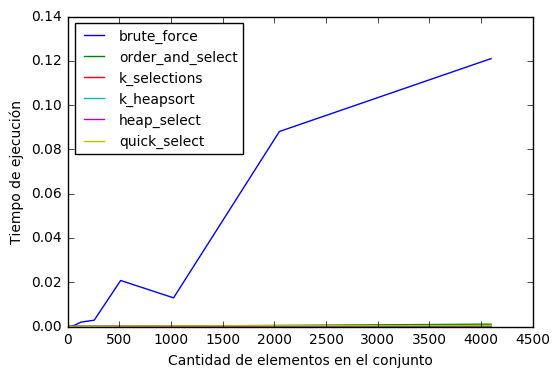

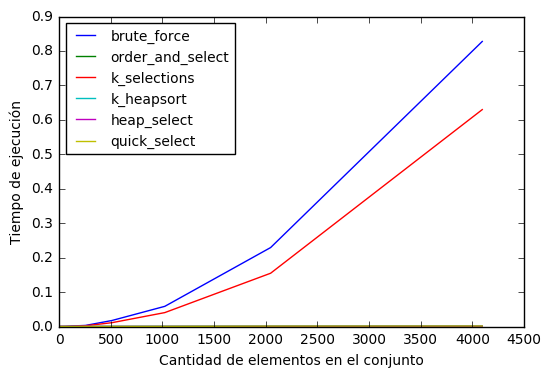

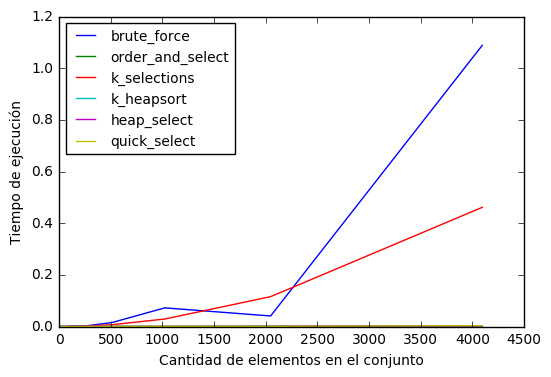

In [8]:
# Maxiter 13 es el útlimo que da tiempos aceptables para el brute force
plot_algorithms([brute_force, order_and_select, k_selections, k_heapsort, heap_select, quick_select], min_k, maxiter=13)
plot_algorithms([brute_force, order_and_select, k_selections, k_heapsort, heap_select, quick_select], max_k, maxiter=13)
plot_algorithms([brute_force, order_and_select, k_selections, k_heapsort, heap_select, quick_select], median_k, maxiter=13)

#### Lo mismo pero sin brute_force

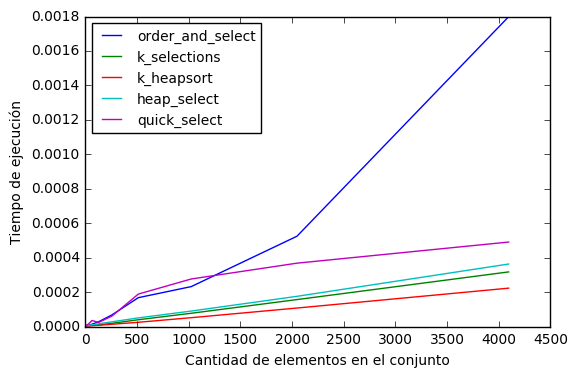

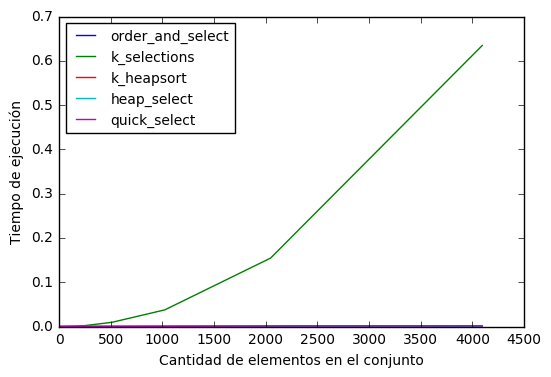

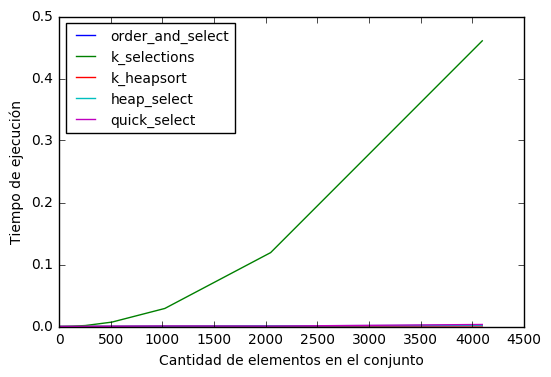

In [9]:
plot_algorithms([order_and_select, k_selections, k_heapsort, heap_select, quick_select], min_k, maxiter=13)
plot_algorithms([order_and_select, k_selections, k_heapsort, heap_select, quick_select], max_k, maxiter=13)
plot_algorithms([order_and_select, k_selections, k_heapsort, heap_select, quick_select], median_k, maxiter=13)

#### Más elementos (2^20)

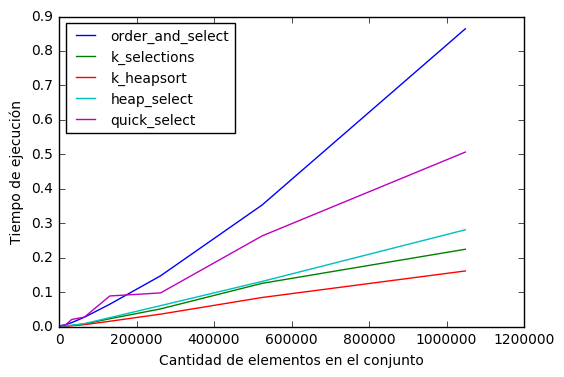

KeyboardInterrupt: 

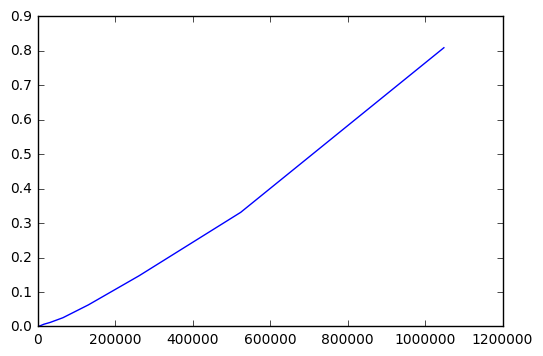

In [ ]:
plot_algorithms([order_and_select, k_selections, k_heapsort, heap_select, quick_select], min_k, maxiter=21)
plot_algorithms([order_and_select, k_selections, k_heapsort, heap_select, quick_select], max_k, maxiter=21)
plot_algorithms([order_and_select, k_selections, k_heapsort, heap_select, quick_select], median_k, maxiter=21)

#### Aún más elementos (2^23) 
Lo dejo comentado porque puede tardar mucho, en mi máquina ~3 minutos y ~700mb de memoria.

In [ ]:
plot_algorithms([order_and_select, k_selections, k_heapsort, heap_select, quick_select], min_k, maxiter=24)
plot_algorithms([order_and_select, k_selections, k_heapsort, heap_select, quick_select], max_k, maxiter=24)
plot_algorithms([order_and_select, k_selections, k_heapsort, heap_select, quick_select], median_k, maxiter=24)

#### Tiempo de ejecución usando listas con el mismo elemento

In [ ]:
#plot_algorithms([brute_force, order_and_select, k_selections, k_heapsort, heap_select], items_getter=get_same_elements, maxiter=13)

#### Lo mismo con 2^20 iteraciones

In [ ]:
#plot_algorithms([brute_force, order_and_select, k_selections, k_heapsort, heap_select], items_getter=get_same_elements, maxiter=21)